In [1]:
!pip install split-folders  # install split folder to split all folders randomly for train, test, val

In [2]:
# import required libraries
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
!pip install keras
import keras
from keras import layers
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential


In [4]:
from google.colab import drive # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import splitfolders

input_folder = '/content/drive/MyDrive/Plant seedling Classification' # Folder where images of all classes stored
output_folder = '/content/dataset'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .0, .2)) # splitted data train, val,test

Copying files: 5609 files [01:29, 62.64 files/s] 


In [6]:
import glob

train_length = 0
test_length = 0

for name in glob.glob('/content/dataset/train/*'):
  train_length += len(glob.glob(name+'/*.png'))

for name in glob.glob('/content/dataset/test/*'):
  test_length += len(glob.glob(name+'/*.png'))

print(train_length,test_length)

4481 1128


In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
data_dir_train = '/content/dataset/train' # path for train dataset
data_dir_test = '/content/dataset/test'

In [9]:
# creating train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="training", seed=123,
                                                               image_size=(img_height, img_width), batch_size=batch_size)

Found 4481 files belonging to 12 classes.
Using 3585 files for training.


In [10]:
# creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="validation", seed=123,
                                                             image_size=(img_height, img_width), batch_size=batch_size)

Found 4481 files belonging to 12 classes.
Using 896 files for validation.


In [11]:
# Listing out all the classes of plant seedlings and store them in a list (Folder names of each category are classes).

labels = sorted(os.listdir(data_dir_train))
print(labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [12]:
### defining the path for training and test images
train_path = "/content/dataset/train/"
test_path = "/content/dataset/test/"

In [13]:
### distibution of classes for each category of data
### It can be seen that data has imbalances in the class distribution
for i in labels:
    directory =train_path + i + '/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.png')))
    print(f'{i} has {length} samples.')

Black-grass has 247 samples.
Charlock has 361 samples.
Cleavers has 273 samples.
Common Chickweed has 570 samples.
Common wheat has 202 samples.
Fat Hen has 432 samples.
Loose Silky-bent has 628 samples.
Maize has 205 samples.
Scentless Mayweed has 514 samples.
Shepherd’s Purse has 219 samples.
Small-flowered Cranesbill has 460 samples.
Sugar beet has 370 samples.


In [14]:
!pip install Augmentor

In [15]:
path_to_training_dataset=train_path

import Augmentor
for i in labels:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 247 image(s) found.
Output directory set to /content/dataset/train/Black-grass/output.

Processing <PIL.Image.Image image mode=RGB size=983x983 at 0x7D8FCD1F31F0>: 100%|██████████| 500/500 [03:03<00:00,  2.72 Samples/s]


Initialised with 361 image(s) found.
Output directory set to /content/dataset/train/Charlock/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=824x824 at 0x7D8FCD12BCA0>: 100%|██████████| 500/500 [00:57<00:00,  8.66 Samples/s]


Initialised with 273 image(s) found.
Output directory set to /content/dataset/train/Cleavers/output.

Processing <PIL.Image.Image image mode=RGB size=207x207 at 0x7D8FB20A7790>: 100%|██████████| 500/500 [00:30<00:00, 16.22 Samples/s]


Initialised with 570 image(s) found.
Output directory set to /content/dataset/train/Common Chickweed/output.

Processing <PIL.Image.Image image mode=RGB size=437x437 at 0x7D8FB20A4F10>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 202 image(s) found.
Output directory set to /content/dataset/train/Common wheat/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=193x193 at 0x7D8FCD158D30>: 100%|██████████| 500/500 [01:14<00:00,  6.75 Samples/s]


Initialised with 432 image(s) found.
Output directory set to /content/dataset/train/Fat Hen/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=306x306 at 0x7D8FCD1BDE40>: 100%|██████████| 500/500 [00:38<00:00, 12.90 Samples/s]


Initialised with 628 image(s) found.
Output directory set to /content/dataset/train/Loose Silky-bent/output.

Processing <PIL.Image.Image image mode=RGB size=254x254 at 0x7D8FB210AE00>: 100%|██████████| 500/500 [01:10<00:00,  7.10 Samples/s]


Initialised with 205 image(s) found.
Output directory set to /content/dataset/train/Maize/output.

Processing <PIL.Image.Image image mode=RGB size=1558x1558 at 0x7D8FCD1A6650>: 100%|██████████| 500/500 [01:34<00:00,  5.26 Samples/s]


Initialised with 514 image(s) found.
Output directory set to /content/dataset/train/Scentless Mayweed/output.

Processing <PIL.Image.Image image mode=RGB size=456x456 at 0x7D8FB20A43D0>: 100%|██████████| 500/500 [00:26<00:00, 18.53 Samples/s]


Initialised with 219 image(s) found.
Output directory set to /content/dataset/train/Shepherd’s Purse/output.

Processing <PIL.Image.Image image mode=RGB size=377x377 at 0x7D8FCD170C70>: 100%|██████████| 500/500 [00:34<00:00, 14.67 Samples/s]


Initialised with 460 image(s) found.
Output directory set to /content/dataset/train/Small-flowered Cranesbill/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=498x498 at 0x7D8FCD1586A0>: 100%|██████████| 500/500 [00:35<00:00, 13.96 Samples/s]


Initialised with 370 image(s) found.
Output directory set to /content/dataset/train/Sugar beet/output.

Processing <PIL.Image.Image image mode=RGB size=548x548 at 0x7D8FB20A7310>: 100%|██████████| 500/500 [01:47<00:00,  4.63 Samples/s]


In [16]:
### Distribution of classes after augmentation
for i in labels:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.png')))
    length_out=len(list(class_directory_out.glob('*.png')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

Black-grass has 747 samples.
Charlock has 861 samples.
Cleavers has 773 samples.
Common Chickweed has 1070 samples.
Common wheat has 702 samples.
Fat Hen has 932 samples.
Loose Silky-bent has 1128 samples.
Maize has 705 samples.
Scentless Mayweed has 1014 samples.
Shepherd’s Purse has 719 samples.
Small-flowered Cranesbill has 960 samples.
Sugar beet has 870 samples.


In [17]:
batch_size = 32
img_height = 224
img_width = 224

In [18]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10481 files belonging to 12 classes.
Using 8385 files for training.


In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10481 files belonging to 12 classes.
Using 2096 files for validation.


# DenseNet 121
Using denseNet 121 model with imagenet weights.

In [20]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

29084464/29084464 [==============================] - 0s 0us/step


In [21]:
input_shape = (224,224,3)
num_classes = 12

In [22]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

In [23]:
base_model.trainable = False

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# spefying the format in which model needs to be saved
model_name = 'Seed' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'
# Creating the call back for saving only the best models
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks_list = [checkpoint, early_stopping, lr_reduce]

In [26]:
epochs = 200
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/200
263/263 [==============================] - ETA: 0s - loss: 1.6302 - accuracy: 0.4706
Epoch 1: val_loss improved from inf to 1.15282, saving model to Seed/model-00001-1.63022-1.15282-.h5
263/263 [==============================] - 135s 407ms/step - loss: 1.6302 - accuracy: 0.4706 - val_loss: 1.1528 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 2/200
262/263 [============================>.] - ETA: 0s - loss: 0.9815 - accuracy: 0.6811
Epoch 2: val_loss improved from 1.15282 to 0.90671, saving model to Seed/model-00002-0.98151-0.90671-.h5
263/263 [==============================] - 98s 363ms/step - loss: 0.9815 - accuracy: 0.6811 - val_loss: 0.9067 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 3/200
262/263 [============================>.] - ETA: 0s - loss: 0.8087 - accuracy: 0.7372
Epoch 3: val_loss did not improve from 0.90671
263/263 [==============================] - 101s 377ms/step - loss: 0.8089 - accuracy: 0.7371 - val_loss: 0.9071 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 4/200
2

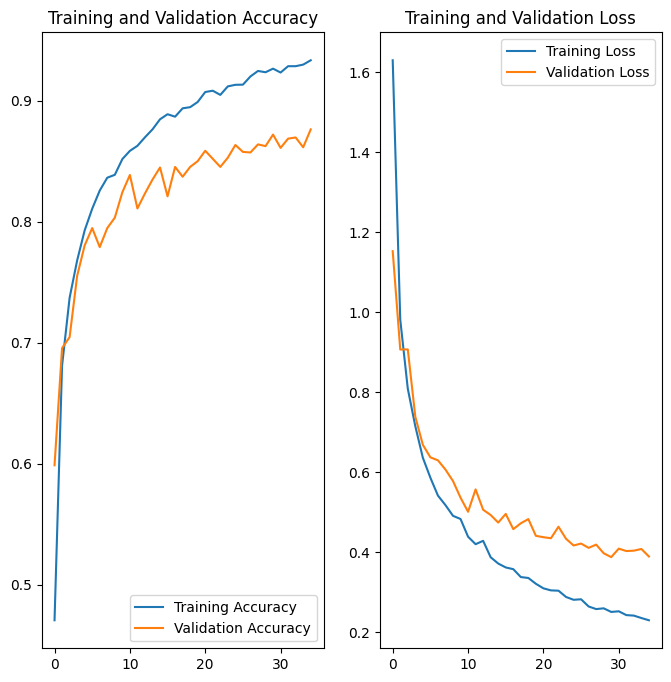

In [27]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**

1. Achieved validation loss 0.38744 and val accuracy 86%.

2. Training is much faster due to transfer learning.

3. Model is not much overfitted.

# InceptionV3

In [45]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [46]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [47]:
input_shape = (224,224,3)
num_classes = 12

In [48]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [49]:
for layer in base_model.layers:
    layer.trainable = False

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# spefying the format in which model needs to be saved
model_name = 'Seed_v3' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'
# Creating the call back for saving only the best models
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks_list = [checkpoint, early_stopping, lr_reduce]

In [ ]:
epochs = 200
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/200
262/263 [============================>.] - ETA: 0s - loss: 5.3894 - accuracy: 0.1690
Epoch 1: val_loss improved from inf to 2.33932, saving model to Seed_v3/model-00001-5.38925-2.33932-.h5
263/263 [==============================] - 105s 360ms/step - loss: 5.3893 - accuracy: 0.1690 - val_loss: 2.3393 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 2/200
262/263 [============================>.] - ETA: 0s - loss: 2.2823 - accuracy: 0.2167
Epoch 2: val_loss improved from 2.33932 to 2.25308, saving model to Seed_v3/model-00002-2.28207-2.25308-.h5
263/263 [==============================] - 90s 335ms/step - loss: 2.2821 - accuracy: 0.2168 - val_loss: 2.2531 - val_accuracy: 0.2137 - lr: 0.0010
Epoch 3/200
262/263 [============================>.] - ETA: 0s - loss: 2.1324 - accuracy: 0.2529
Epoch 3: val_loss improved from 2.25308 to 2.17429, saving model to Seed_v3/model-00003-2.13248-2.17429-.h5
263/263 [==============================] - 91s 333ms/step - loss: 2.1325 - accuracy: 0.2528 - 

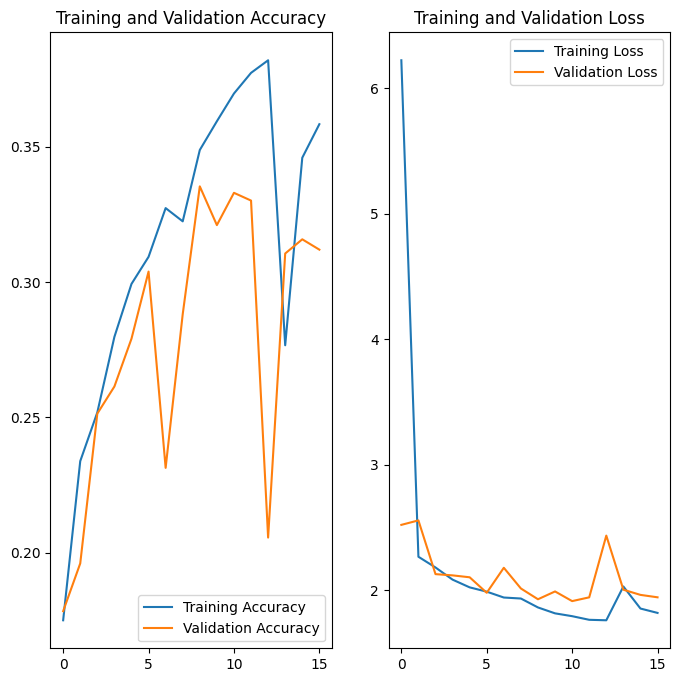

In [36]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations:**

1. Val_loss= 1.765, Validation accuracy is lesser than 40%.

2. Very poor performance.